In [74]:
import pandas as pd
df = pd.read_excel("komentar_netizen.xlsx")
df.info

<bound method DataFrame.info of                                               Komentar
0          Dosen ketemu pertanyaan y jawabanny bagus,.
1    Coba perhatikan Anies, bukan senyum melaikan A...
2    Waktu kemarin debat pertama menurut saya pak A...
3    Nilai debat kemarin \nPaslon 1 = 120\nPaslom 2...
4    Suka banget lihat percakapan dan bahasa tubuh ...
5                                    Palestina dibawa2
6                                   Pk Prabowo,no 2\n❤
7    Ijin komen, mohon kedepannya komentatornya dig...
8    Saya makin semangat mendukung anis, karna tata...
9    Semakin kau serang prabowo semakin kami nyakin...
10   Pak Prabowo hebat pak jgn terkecoh sama dua Pa...
11   Gua setuju nih sama yang pake kemeja putih kac...
12   Dari 4 menit pembukaan anis, cuma kata kata "f...
13   Man of the Match Pak Ganjar Pranowo...total pe...
14   Kpu tolong waktunya lebih panjng lagi untuk si...
15   Siapa pun presiden ny smoga semakin jaya dan s...
16                               

Tokenizing

In [75]:
import re
import string
from nltk.tokenize import word_tokenize 

# case folding
df['Komentar'] = df['Komentar'].str.lower()

# menghilangkan replies tag username
def hilangkan_tag_username(teks):
    pola_username = r'@@\w+'
    teks_bersih = re.sub(pola_username, '', teks)
    return teks_bersih

df['Komentar'] = df['Komentar'].apply(hilangkan_tag_username)

# remove non ASCII character
def remove_non_ASCII(text):
    return text.encode('ascii', 'replace').decode('ascii')

df['Komentar'] = df['Komentar'].apply(remove_non_ASCII)

# remove number
def remove_number(text):
    return re.sub(r"\d+", "", text)

df['Komentar'] = df['Komentar'].apply(remove_number)

# remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

df['Komentar'] = df['Komentar'].apply(remove_punctuation)

# remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Komentar'] = df['Komentar'].apply(remove_whitespace_LT)

# remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

df['Komentar'] = df['Komentar'].apply(remove_whitespace_multiple)

# remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Komentar'] = df['Komentar'].apply(remove_single_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['komentar_tokens'] = df['Komentar'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['komentar_tokens'].head())

Tokenizing Result : 

0        [dosen, ketemu, pertanyaan, jawabanny, bagus]
1    [coba, perhatikan, anies, bukan, senyum, melai...
2    [waktu, kemarin, debat, pertama, menurut, saya...
3    [nilai, debat, kemarin, paslon, paslom, paslon...
4    [suka, banget, lihat, percakapan, dan, bahasa,...
Name: komentar_tokens, dtype: object


Stopword Removal

In [76]:
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()

stopwords_indonesian = stopwords.words('indonesian')
stopwords_english = stopwords.words('english')

list_stopwords = stopwords_indonesian + stopwords_english + sastrawi_stopwords


list_stopwords.extend(
    ["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'kalo', 'amp', 'biar', 
     'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 
     'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 'jgn', 'sdh', 'aja', 'n', 
     't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', '&amp', 'yah', 
     'lu', 'gw', 'pa', 'pk', 'jg', 'ttep', 'mef', 'tpat', 'jbol', 'bnr', 
     'kyk', 'mu', 'dlm', 'pret', 'kau', 'tp', 'knp', 'jdi', 'wonng', 'wkwk'
     'paslom', 'kau', 'nyakin', 'jembuttt','bla', 'badazzzz', 'btw', 'bapakkk', 
     'loveee','youuu','yaaa','pakkkkkk', 'dri', 'mksd', 'emhhh', 'fix', 'iyes', 'sok',
     'ato', 'woy', 'taw', 'klw', 'ttp', 'mnt', 'bro', 'byk', 'org', 'uda', 'aj'
     'amoh', 'dr', 'bg', 'bang', 'iya', 'ky', 'aq', 'yak', 'eh', 'phpin', 'ama',
     'ampe', 'hrs', 'oc', 'mak', 'ta', 'gk', 'fak', 'ehh', 'duh', 'lgi', 'sma', 
     'gue', 'gua', 'wooyyyyy', 'udh', 'kek', 'ja', 'wawdaw', 'ps', 'pa', 'ngab',
     'bong', 'bruh', 'lho', 'lur', 'ajj', 'gtu', 'ad', 'seh', 'bu', 'trs', 'mmg',
     'ni', 'mah', 'wkskw', 'bnr', 
    ]
)


# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['komentar_tokens_WSW'] = df['komentar_tokens'].apply(stopwords_removal) 

print(df['komentar_tokens_WSW'].head())

0                    [dosen, ketemu, jawabanny, bagus]
1    [coba, perhatikan, anies, senyum, melaikan, an...
2    [kemarin, debat, anies, bagus, kali, debat, ke...
3    [nilai, debat, kemarin, paslon, paslom, paslon...
4    [suka, banget, lihat, percakapan, bahasa, tubu...
Name: komentar_tokens_WSW, dtype: object


Cleaning the dataset

In [77]:
# Gantikan nilai kosong dengan NaN
df.replace('', pd.NA, inplace=True)

# Gantikan nilai list kosong dengan NaN
df['komentar_tokens_WSW'] = df['komentar_tokens_WSW'].apply(lambda x: pd.NA if not x else x)

# Menghapus baris yang memiliki nilai NaN
df = df.dropna()

# Mereset indeks
df = df.reset_index(drop=True)

# Menampilkan DataFrame setelah perubahan
print(df)

                                              Komentar  \
0             dosen ketemu pertanyaan  jawabanny bagus   
1    coba perhatikan anies bukan senyum melaikan an...   
2    waktu kemarin debat pertama menurut saya pak a...   
3    nilai debat kemarin paslon paslom paslon ini n...   
4    suka banget lihat percakapan dan bahasa tubuh ...   
5                                     palestina dibawa   
6                                         pk prabowono   
7    ijin komen mohon kedepannya komentatornya diga...   
8    saya makin semangat mendukung anis karna tata ...   
9    semakin kau serang prabowo semakin kami nyakin...   
10   pak prabowo hebat pak jgn terkecoh sama dua pa...   
11   gua setuju nih sama yang pake kemeja putih kac...   
12   dari menit pembukaan anis cuma kata kata food ...   
13   man of the match pak ganjar pranowototal penam...   
14   kpu tolong waktunya lebih panjng lagi untuk si...   
15   siapa pun presiden ny smoga semakin jaya dan s...   
16           p

Stemming

In [80]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['komentar_tokens_WSW']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['komentar_tokens_stemmed'] = df['komentar_tokens_WSW'].swifter.apply(get_stemmed_term)
print(df['komentar_tokens_stemmed'])

1829
------------------------
dosen : dosen
ketemu : ketemu
jawabanny : jawabanny
bagus : bagus
coba : coba
perhatikan : perhati
anies : anies
senyum : senyum
melaikan : lai
mulutnya : mulut
mingkem : mingkem
ngomong : ngomong
doang : doang
kerja : kerja
kemarin : kemarin
debat : debat
kali : kali
ketiga : tiga
setuju : tuju
ganjar : ganjar
unggul : unggul
jawabannya : jawab
nilai : nilai
paslon : paslon
paslom : paslom
tensi : tensi
darah : darah
suka : suka
banget : banget
lihat : lihat
percakapan : cakap
bahasa : bahasa
tubuh : tubuh
baswedan : baswedan
disindir : sindir
bahagia : bahagia
gestur : gestur
adem : adem
seneng : neng
lihatnya : lihat
dunia : dunia
internasional : internasional
palestina : palestina
dibawa : bawa
prabowono : prabowono
ijin : ijin
komen : komen
mohon : mohon
kedepannya : depan
komentatornya : komentator
diganti : ganti
fair : fair
pro : pro
manapun : mana
bahas : bahas
komentator : komentator
kanan : kanan
ngulasnya : ngulasnya
jas : jas
biru : biru
blaka

Pandas Apply:   0%|          | 0/350 [00:00<?, ?it/s]

0                      [dosen, ketemu, jawabanny, bagus]
1      [coba, perhati, anies, senyum, lai, anies, mul...
2      [kemarin, debat, anies, bagus, kali, debat, ti...
3      [nilai, debat, kemarin, paslon, paslom, paslon...
4      [suka, banget, lihat, cakap, bahasa, tubuh, an...
5                                      [palestina, bawa]
6                                            [prabowono]
7      [ijin, komen, mohon, depan, komentator, ganti,...
8      [semangat, dukung, anis, karna, tata, bicara, ...
9           [serang, prabowo, coblos, prabowo, subianto]
10     [prabowo, hebat, kecoh, paslon, suruh, buka, r...
11     [tuju, pake, kemeja, putih, kacamata, anis, ng...
12     [menit, buka, anis, food, estate, kaya, kroni,...
13     [man, match, ganjar, pranowototal, penampilann...
14                         [kpu, panjng, jawab, perinci]
15     [presiden, smoga, jaya, sejahtera, sluruh, rak...
16                        [anis, kedip, mata, kuat, bgt]
17     [tonton, hadir, kampung,

LDA

In [89]:
# import gensim
# from gensim import corpora

# doc_clean = df['komentar_tokens_stemmed']
# dictionary = corpora.Dictionary(doc_clean)
# doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [93]:
# # Creating the object for LDA model using gensim library
# Lda = gensim.models.ldamodel.LdaModel

# total_topics = 5 # jumlah topik yang akan di extract
# number_words = 5 # jumlah kata per topik

In [91]:
# # Running and Trainign LDA model on the document term matrix.
# lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)

# lda_model.show_topics(num_topics=total_topics, num_words=number_words)

[(0,
  '0.027*"prabowo" + 0.022*"ganjar" + 0.015*"anis" + 0.009*"serang" + 0.009*"negara"'),
 (1,
  '0.042*"prabowo" + 0.022*"anis" + 0.016*"orang" + 0.015*"anies" + 0.012*"jakarta"'),
 (2,
  '0.018*"anis" + 0.017*"ganjar" + 0.014*"debat" + 0.010*"hati" + 0.010*"indonesia"'),
 (3,
  '0.026*"prabowo" + 0.016*"anies" + 0.013*"kerja" + 0.012*"pilih" + 0.010*"presiden"'),
 (4,
  '0.019*"debat" + 0.013*"anies" + 0.011*"presiden" + 0.010*"data" + 0.009*"nilai"')]

In [92]:
# # Word Count of Topic Keywords

# from collections import Counter
# topics = lda_model.show_topics(formatted=False)
# data_flat = [w for w_list in doc_clean for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
# print(df_imp_wcount)

         word  topic_id  importance  word_count
0     prabowo         0    0.027100         121
1      ganjar         0    0.022420          65
2        anis         0    0.015304          72
3      serang         0    0.008838          17
4      negara         0    0.008833          27
5   indonesia         0    0.006579          31
6     nyerang         0    0.005604          10
7       tahan         0    0.005602          14
8        wowo         0    0.005597          11
9       pilih         0    0.005596          26
10    prabowo         1    0.042023         121
11       anis         1    0.022237          72
12      orang         1    0.015826          31
13      anies         1    0.014693          62
14    jakarta         1    0.012460          19
15    ngomong         1    0.009573          23
16     rendah         1    0.008469          12
17      kasih         1    0.008386          13
18     ganjar         1    0.007287          65
19       kaya         1    0.007063     

In [94]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

data = df['komentar_tokens_stemmed']
# Create a dictionary from the preprocessed data
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['debat', 'paslon', 'nilai', 'anies', 'beliau', 'menang', 'presiden', 'kuat', 'unggul', 'tahan']
Topic: 1
Words: ['anies', 'ganjar', 'prabowo', 'orang', 'pilih', 'indonesia', 'dukung', 'jakarta', 'negara', 'presiden']
Topic: 2
Words: ['prabowo', 'anis', 'ganjar', 'presiden', 'kerja', 'serang', 'debat', 'data', 'ngomong', 'nyata']
Topic: 3
Words: ['prabowo', 'usaha', 'ambisi', 'tentara', 'tuju', 'kasih', 'bekas', 'bener', 'kuasa', 'payah']
Topic: 4
Words: ['fakta', 'data', 'anis', 'jejak', 'rekam', 'lihat', 'kosong', 'omong', 'debat', 'udah']


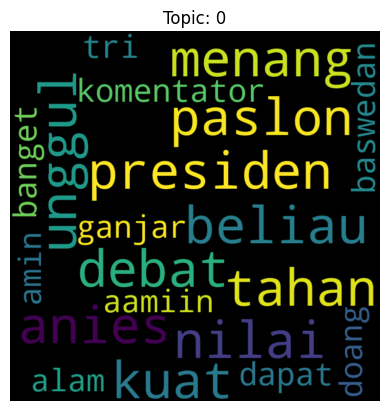

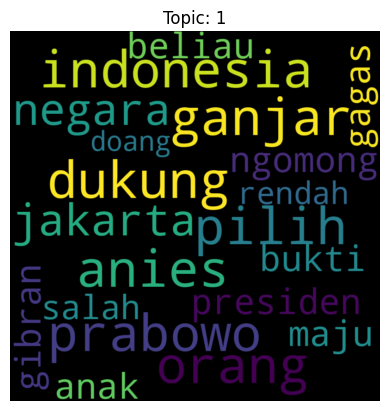

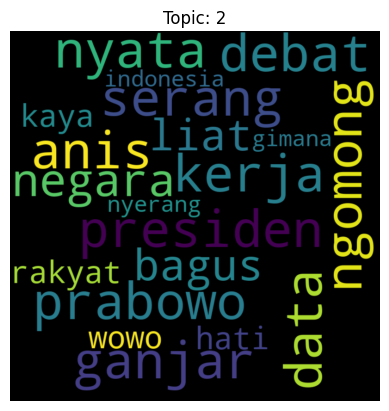

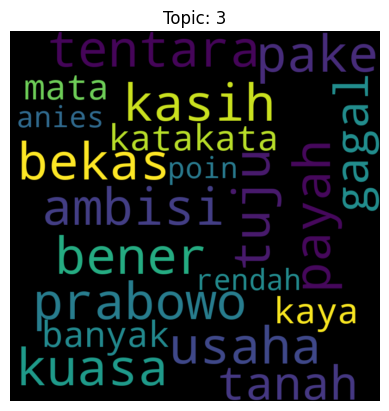

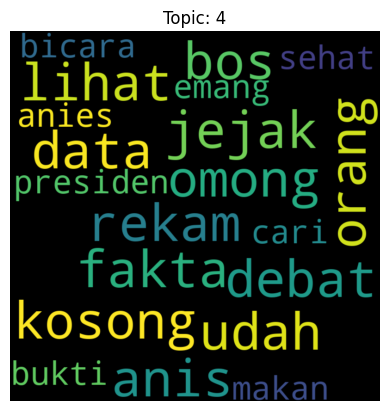

In [95]:
# Plotting a wordcloud of the topics

from wordcloud import WordCloud 
import matplotlib.pyplot as plt

for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()